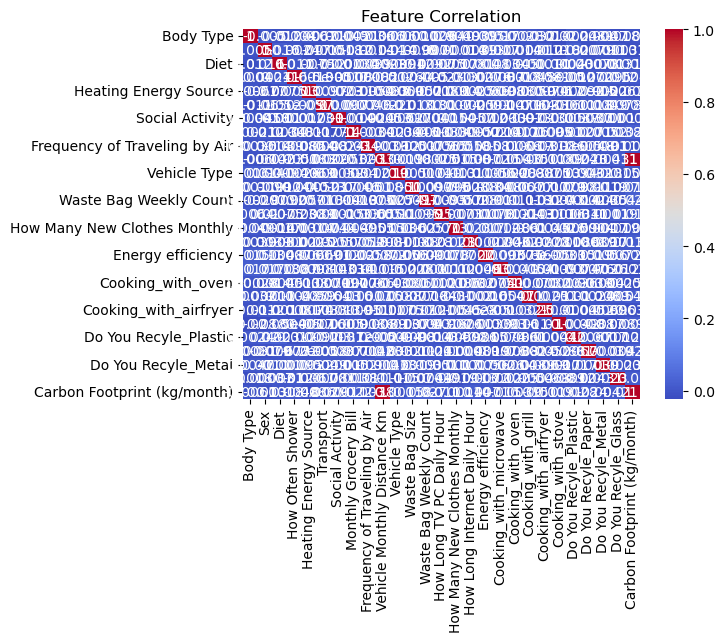

SVR: MSE = 1192278.942, R² = 0.098
Decision Tree: MSE = 872680.526, R² = 0.340
Random Forest: MSE = 734232.862, R² = 0.445
Gradient Boosting: MSE = 426083.766, R² = 0.678
MLP Regressor: MSE = 5168.356, R² = 0.996

✅ Best model: MLP Regressor


In [3]:
# === 1. Import Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import pickle

# === 2. Load Dataset ===
df = pd.read_csv(r"C:\Users\hp\Desktop\Carbon-Footprint-Calculator-App-main/combined_carbon_footprint_dataset.csv")

# === 3. Preprocessing ===
def preprocess_data(df):
    df = df.copy()
    label_encoders = {}
    for col in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
    return df, label_encoders

df_clean, encoders = preprocess_data(df)
X = df_clean.drop('Carbon Footprint (kg/month)', axis=1)
y = df_clean['Carbon Footprint (kg/month)']

# === 4. Scaling ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === (Optional) PCA ===
pca = PCA(n_components=0.95)  # Retain 95% variance
X_scaled = pca.fit_transform(X_scaled)

# === 5. Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# === 6. Visualization ===
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# === 7. Model Definitions ===
models = {
    "SVR": SVR(C=0.5, epsilon=0.2),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42),
    "MLP Regressor": MLPRegressor(
        hidden_layer_sizes=(128, 64, 32),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        learning_rate_init=0.001,
        early_stopping=True,
        max_iter=2000,
        random_state=42
    )
}

# === 8. Model Evaluation ===
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = (mse, r2)
    print(f"{name}: MSE = {mse:.3f}, R² = {r2:.3f}")

# === 9. Select Best Model ===
best_model_name = min(results, key=lambda k: results[k][0])
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name}")

# === 10. Save Best Model and Scaler ===
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("pca.pkl", "wb") as f:
    pickle.dump(pca, f)
